# COVID-19 ANALYSIS

1. Clone CSV file from github.

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 38045 (delta 0), reused 2 (delta 0), pack-reused 38038
Receiving objects: 100% (38045/38045), 283.13 MiB | 30.77 MiB/s, done.
Resolving deltas: 100% (23083/23083), done.
Checking out files: 100% (482/482), done.


2. Initialize variables with paths that we are about to work on.


In [ ]:
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

deaths_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

rec_csv ='/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

3. Import required modules to be used.

In [ ]:
import pandas as pd # Data processing 
import matplotlib.pyplot as plt # Data visualisation 
import seaborn as sns # Data visualisation import folium # Cartograms / maps 
import datetime # Work with date and time values
import folium
%matplotlib inline


4. Read the corresponding file. The first five rows are displayed with head() function.

In [ ]:
conf_df = pd.read_csv(conf_csv) # Display the first five rows of the 'conf_df' DataFrame. 
conf_df.head()


Province/State Country/Region      Lat  ...  7/4/20  7/5/20  7/6/20
0            NaN    Afghanistan  33.0000  ...   32672   32951   33190
1            NaN        Albania  41.1533  ...    2819    2893    2964
2            NaN        Algeria  28.0339  ...   15500   15941   16404
3            NaN        Andorra  42.5063  ...     855     855     855
4            NaN         Angola -11.2027  ...     346     346     346

[5 rows x 171 columns]

5.*shape* is used to display the dimensions of the entire file.
 i.e (rows, columns)

In [ ]:
conf_df.shape


(266, 171)

6. Now, let’s create a series of the total confirmed cases of coronavirus reported: 
• Across globe 
• In China 
• In India 
• In the US 

In [ ]:
global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0) # Converting the indices to datetime values. 
global_cases.index = pd.to_datetime(global_cases.index) # The datetime value is formatted in the yyyy-mm-dd format. 
global_cases


2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-02    10871926
2020-07-03    11076086
2020-07-04    11269114
2020-07-05    11452196
2020-07-06    11620096
Length: 167, dtype: int64

Let's find out the rate of confirmed cases via Line plot

In [ ]:
china_cases = conf_df[conf_df['Country/Region'] == 'China'].iloc[:, 4:].apply(sum, axis=0) 
china_cases.index = pd.to_datetime(china_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.
# Total confirmed cases in India. 
india_cases = conf_df[conf_df['Country/Region'] == 'India'].iloc[:, 4:].apply(sum, axis=0) 
india_cases.index = pd.to_datetime(india_cases.index)
# Total confirmed cases in the US. 
us_cases = conf_df[conf_df['Country/Region'] == 'US'].iloc[:, 4:].apply(sum, axis=0) 
us_cases.index = pd.to_datetime(us_cases.index)

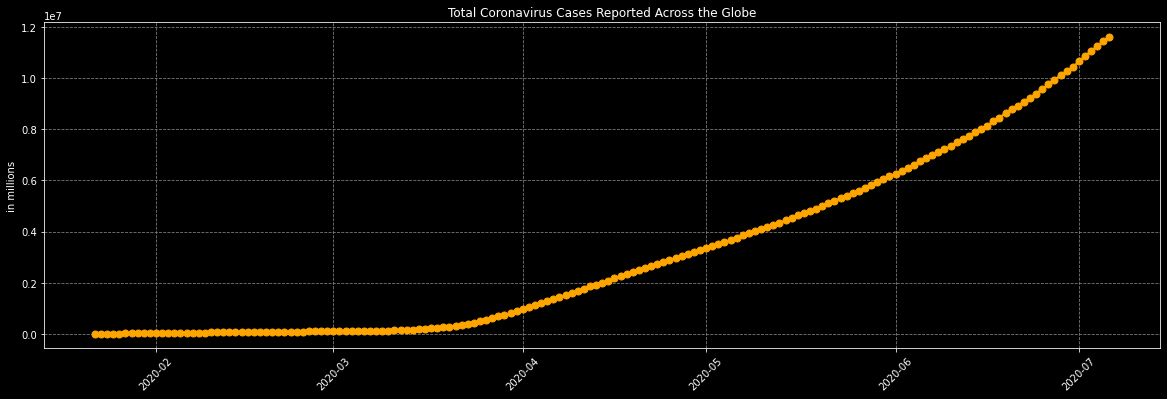

In [ ]:
plt.style.use('dark_background') 
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported Across the Globe') 
plt.plot(global_cases.index, global_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45) 
plt.ylabel('in millions') 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


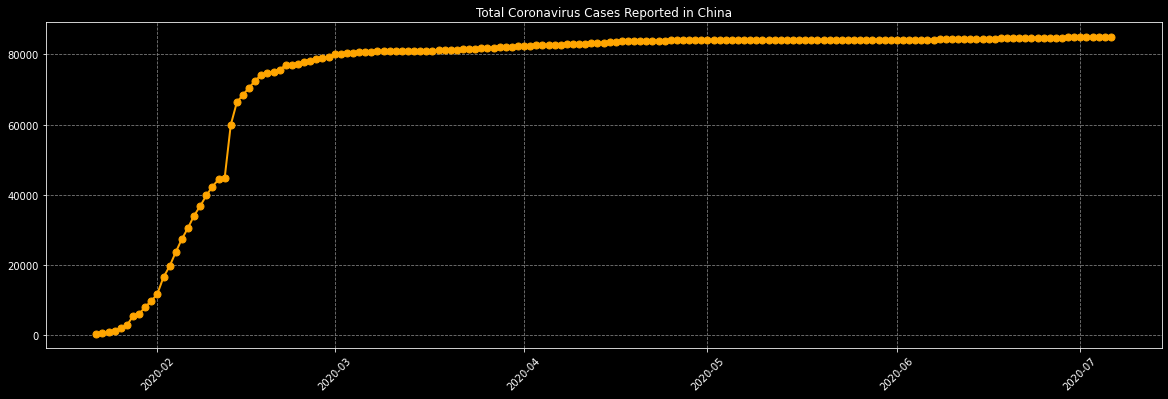

In [ ]:
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported in China') 
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7) 
plt.xticks(rotation=45) 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


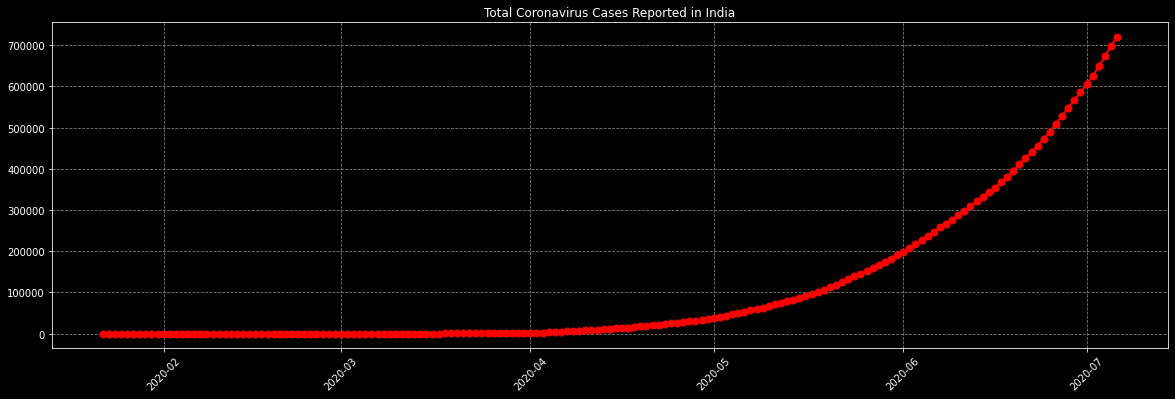

In [ ]:
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported in India') 
plt.plot(india_cases.index, india_cases, c='r', linewidth=2, marker='o', markersize=7) 
plt.xticks(rotation=45) 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


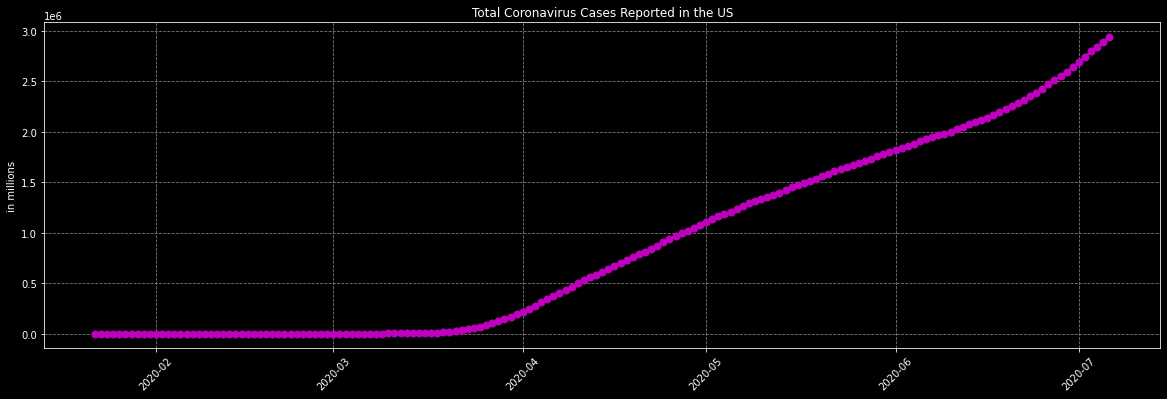

In [ ]:
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported in the US') 
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7) 
plt.xticks(rotation=45) 
plt.ylabel("in millions") 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


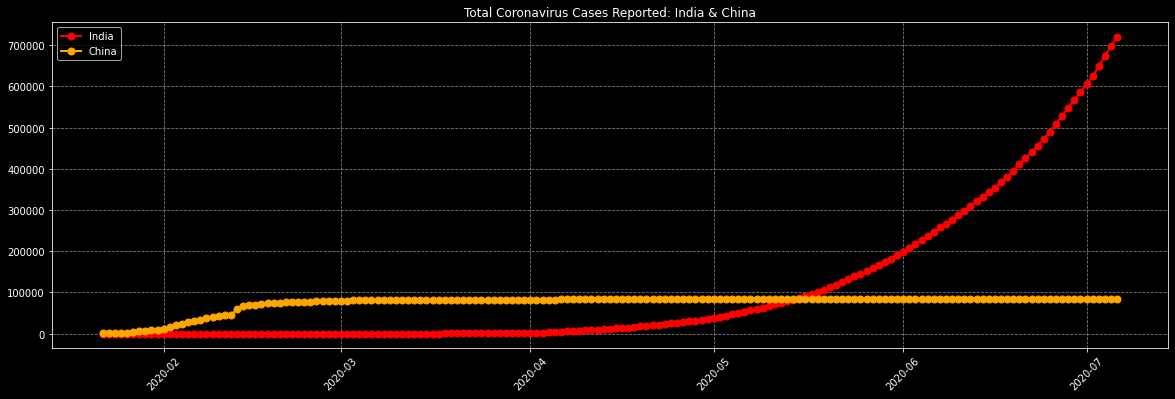

In [ ]:
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported: India & China') 
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o',markersize=7, label='India') 
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o',markersize=7, label='China') 
plt.xticks(rotation=45) 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.legend() 
plt.show()


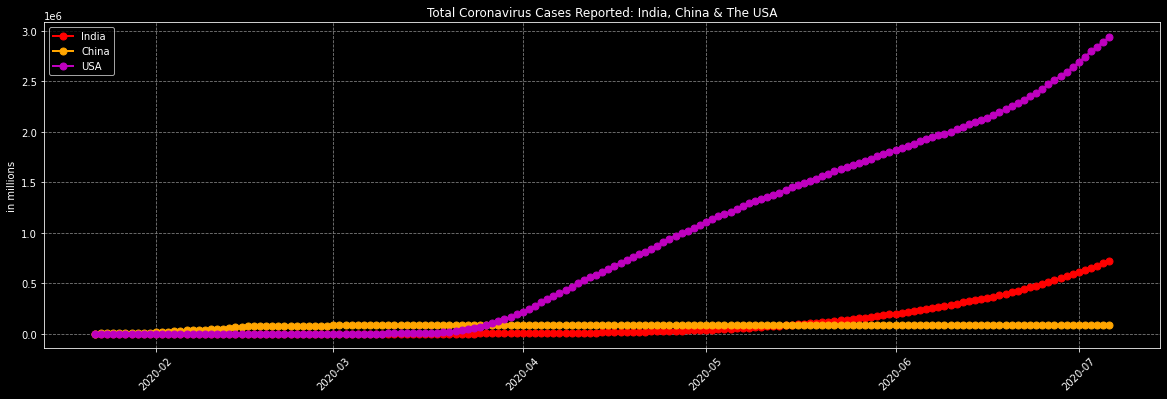

In [ ]:
plt.figure(figsize=(20, 6)) 
plt.title('Total Coronavirus Cases Reported: India, China & The USA') 
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o',markersize=7, label='India') 
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o',markersize=7, label='China') 
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o',markersize=7, label='USA') 
plt.xticks(rotation=45) 
plt.ylabel('in millions') 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.legend() 
plt.show()

 Let’s identify the top 5 countries having the most number of confirmed coronavirus cases till date via a mechanism called GROUPING

In [ ]:
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum() 
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False) 
desc_grp_conf_df.head()


Country/Region      Lat     Long  ...   7/4/20   7/5/20   7/6/20
174             US  37.0902 -95.7129  ...  2841241  2891124  2936077
23          Brazil -14.2350 -51.9253  ...  1577004  1603055  1623284
79           India  21.0000  78.0000  ...   673165   697413   719664
140         Russia  60.0000  90.0000  ...   673564   680283   686852
134           Peru  -9.1900 -75.0152  ...   299080   302718   305703

[5 rows x 170 columns]

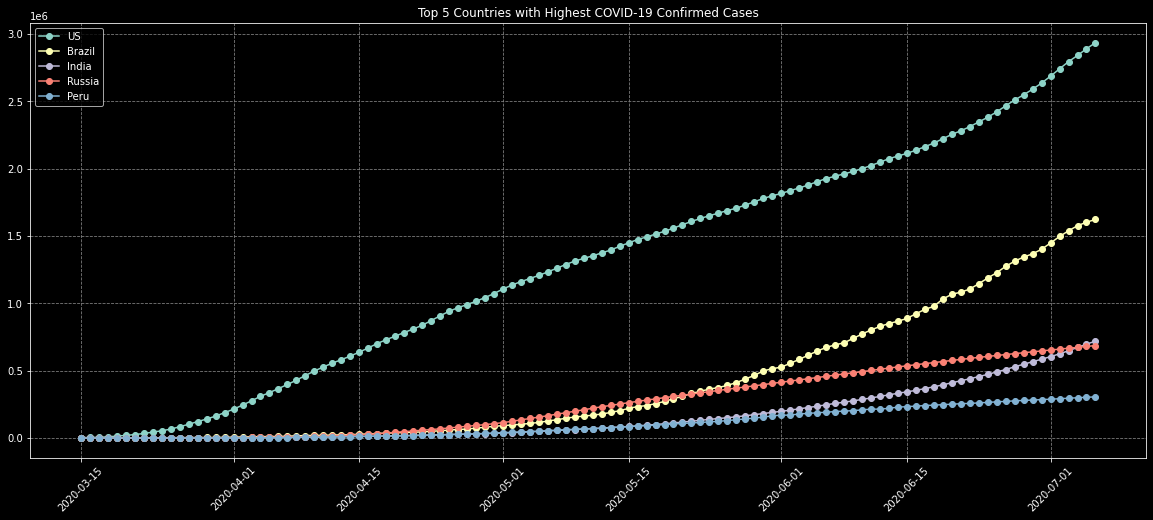

In [ ]:
plt.figure(figsize=(20, 8)) 
plt.title('Top 5 Countries with Highest COVID-19 Confirmed Cases') 
for region in desc_grp_conf_df.head()['Country/Region']: 
  plt.plot(global_cases.index[53:], desc_grp_conf_df[desc_grp_conf_df['Country/Region'] == region].iloc[0, 56:], '-o', label=region )
plt.xticks(rotation=45) 
plt.legend() 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


Top 20 countries are displayed using BAR PLOT.

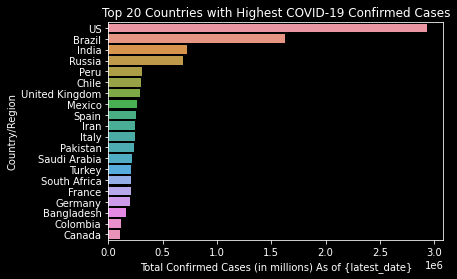

In [ ]:
last_col = conf_df.columns[-1] # Modify the latest date in the 'Month DD, YYYY' format. latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d,%Y')
# Create a bivariate bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases. plt.figure(figsize=(15, 10)) 
plt.title('Top 20 Countries with Highest COVID-19 Confirmed Cases') 
sns.barplot(desc_grp_conf_df[last_col].head(20), desc_grp_conf_df['Country/Region'].head(20), orient='h') 
plt.xlabel('Total Confirmed Cases (in millions) As of {latest_date}') 
plt.show()


 Cartograms (or Maps) For China:  Let’s create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with location markers. The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.


In [ ]:
conf_china_df = conf_df[conf_df['Country/Region'] == 'China']
# Map to show the distribution of confirmed coronavirus cases in China (regular markers). 
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.25) 
for i in conf_china_df.index: 
  folium.Marker(location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
  popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col])).add_to(china_map) 
china_map



In [ ]:
china_map = folium.Map(location=[30.9756, 112.2707], width='100%',height='90%', tiles='Stamen Toner', zoom_start=4.5) 
for i in conf_china_df.index: 
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 2, location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i,'Long']],
  popup= conf_china_df.loc[i, 'Province/State'] + "\n" +str(conf_china_df.loc[i, last_col]), color='crimson', fill=True, fill_color='crimson').add_to(china_map) 
china_map


CARTOGRAMS FOR WORLD MAP

In [ ]:
world_map = folium.Map(location=[0, 0], width='100%', height='80%', tiles='Stamen Toner', zoom_start=2.25) 
for i in conf_df.index: 
  folium.Circle(location=[conf_df.loc[i, 'Lat'], conf_df.loc[i, 'Long']], radius=int(conf_df.loc[i, last_col]), 
                popup=conf_df.loc[i, 'Country/Region'] + '\n' + str(conf_df.loc[i, last_col]), 
                color='crimson', fill=True, fill_color='crimson').add_to(world_map) 
world_map


**Cartogram (or Maps) For The USA**

Let’s also create a cartogram specifically for the United States for America. 

In [ ]:
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv' 
us_conf_df = pd.read_csv(us_conf_csv) 
us_conf_df = us_conf_df.dropna()
us_map = folium.Map(location=[39.381266, -97.922211], width='100%',height='80%', tiles='Stamen Toner', zoom_start=4) 
for i in us_conf_df.index: 
  folium.Circle(location=[us_conf_df.loc[i, 'Lat'], us_conf_df.loc[i, 'Long_']], radius=int(us_conf_df.loc[i, last_col]), 
                popup=us_conf_df.loc[i, 'Province_State'] + '\n' + str(us_conf_df.loc[i, last_col]), color='crimson', fill=True, fill_color='crimson').add_to(us_map) 
us_map


In [ ]:
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4] 
non_cum_conf_df


Country/Region        Lat        Long  1/22/20
174                     US  37.090200  -95.712900        1
23                  Brazil -14.235000  -51.925300        0
79                   India  21.000000   78.000000        0
140                 Russia  60.000000   90.000000        0
134                   Peru  -9.190000  -75.015200        0
..                     ...        ...         ...      ...
142  Saint Kitts and Nevis  17.357822  -62.782998        0
75                Holy See  41.902900   12.453400        0
132       Papua New Guinea  -6.315000  143.955500        0
184         Western Sahara  24.215500  -12.885800        0
104             MS Zaandam   0.000000    0.000000        0

[188 rows x 4 columns]

In [ ]:
for i in range(len(desc_grp_conf_df.columns[3:]) - 1): 
  series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] -desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]] 
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series
non_cum_conf_df.head()


Country/Region      Lat     Long  1/22/20  ...  7/3/20  7/4/20  7/5/20  7/6/20
174             US  37.0902 -95.7129        1  ...   53312   45880   49883   44953
23          Brazil -14.2350 -51.9253        0  ...   42223   37923   26051   20229
79           India  21.0000  78.0000        0  ...   22771   24850   24248   22251
140         Russia  60.0000  90.0000        0  ...    6710    6623    6719    6569
134           Peru  -9.1900 -75.0152        0  ...    3595    3481    3638    2985

[5 rows x 170 columns]

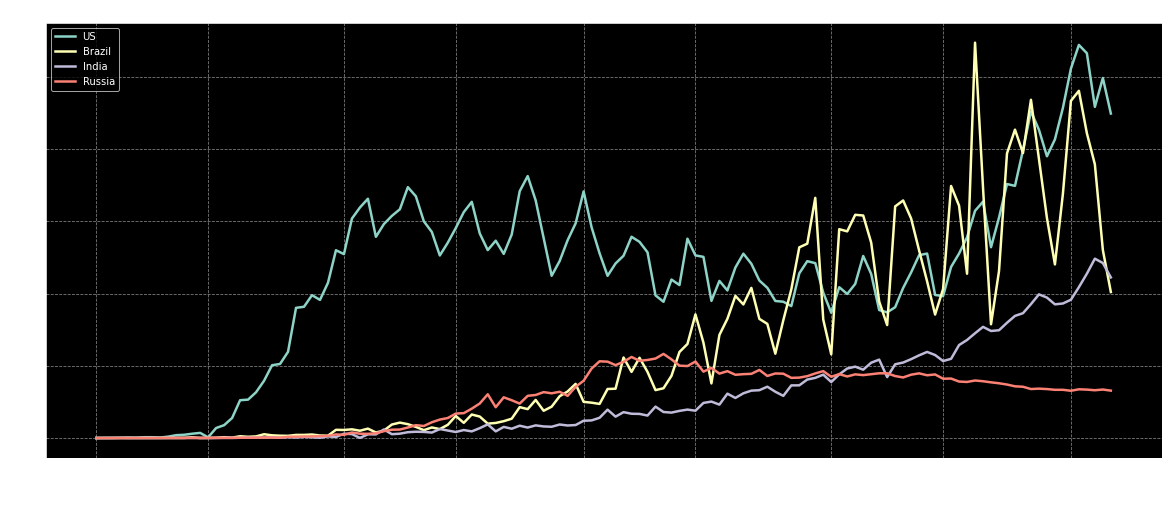

In [ ]:
plt.figure(figsize=(20, 8)) 
plt.title('Non-Cumulative COVID-19 Confirmed Cases') 
for region in non_cum_conf_df.iloc[:4, :]['Country/Region']: 
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region) 
plt.xticks(rotation=45) 
plt.legend() 
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()


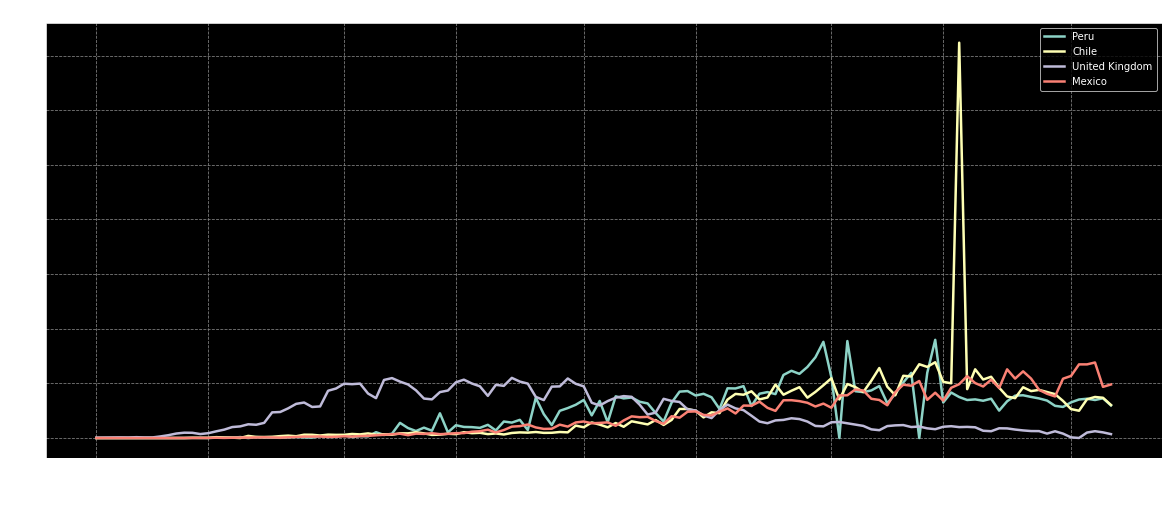

In [ ]:
plt.figure(figsize=(20, 8)) 
plt.title('Non-Cumulative COVID-19 Confirmed Cases') 
for region in non_cum_conf_df.iloc[4:8, :]['Country/Region']: 
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region) 
plt.xticks(rotation=45) 
plt.legend() 
plt.grid(True, 'major', linestyle='--', c='grey') 
plt.show()


In [ ]:
countries = [] 
for i in non_cum_conf_df.index: 
  last_14_days = [] 
  for j in range(14): 
    last_14_days.append(non_cum_conf_df.loc[i, non_cum_conf_df.columns[-(j + 1)]]) 
  if sum(last_14_days) <= 1400: 
    countries.append(non_cum_conf_df.loc[i, 'Country/Region']) 
countries


['China',
 'Netherlands',
 'Switzerland',
 'Ireland',
 'Austria',
 'Korea, South',
 'Denmark',
 'Cameroon',
 'Sudan',
 'Norway',
 'Australia',
 'Malaysia',
 'Finland',
 'Haiti',
 'Tajikistan',
 'Ethiopia',
 'Gabon',
 'Guinea',
 'Djibouti',
 'Luxembourg',
 'Hungary',
 'Central African Republic',
 'Greece',
 'Kosovo',
 'Croatia',
 'Thailand',
 'Somalia',
 'Albania',
 'Nicaragua',
 'Maldives',
 'Paraguay',
 'Cuba',
 'Mali',
 'Sri Lanka',
 'South Sudan',
 'Estonia',
 'Lebanon',
 'Iceland',
 'Lithuania',
 'Guinea-Bissau',
 'Slovakia',
 'Malawi',
 'Slovenia',
 'Zambia',
 'Congo (Brazzaville)',
 'Sierra Leone',
 'New Zealand',
 'Cabo Verde',
 'Yemen',
 'Benin',
 'Tunisia',
 'Jordan',
 'Latvia',
 'Libya',
 'Rwanda',
 'Niger',
 'Mozambique',
 'Eswatini',
 'Cyprus',
 'Burkina Faso',
 'Uruguay',
 'Georgia',
 'Uganda',
 'Liberia',
 'Chad',
 'Andorra',
 'Montenegro',
 'Jamaica',
 'Zimbabwe',
 'Sao Tome and Principe',
 'Diamond Princess',
 'San Marino',
 'Togo',
 'Malta',
 'Suriname',
 'Tanzania',
 

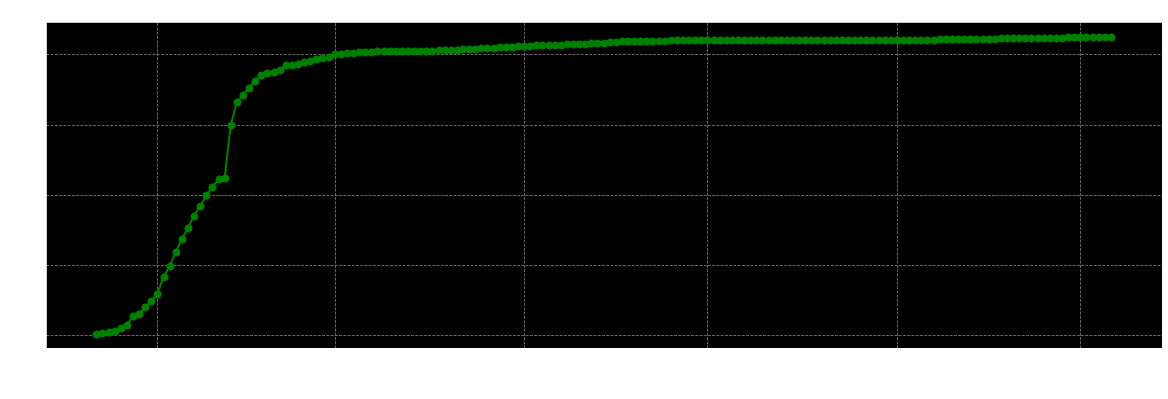

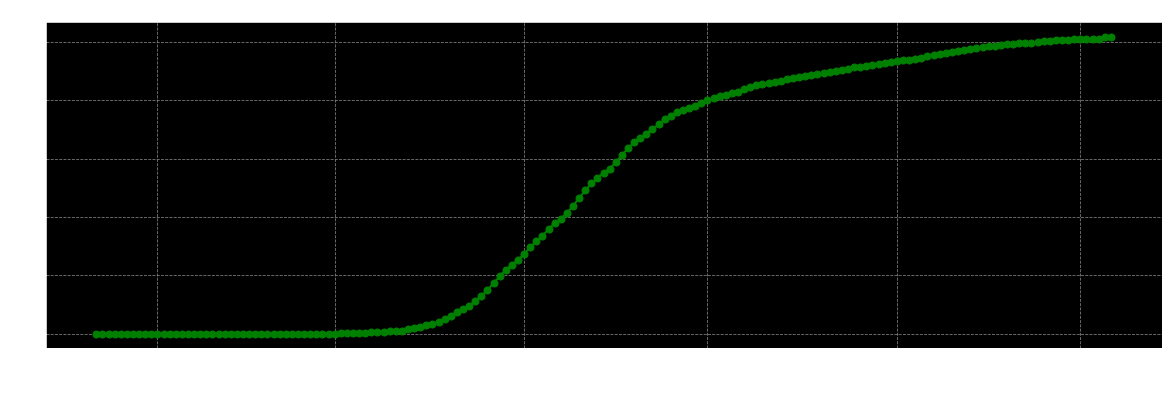

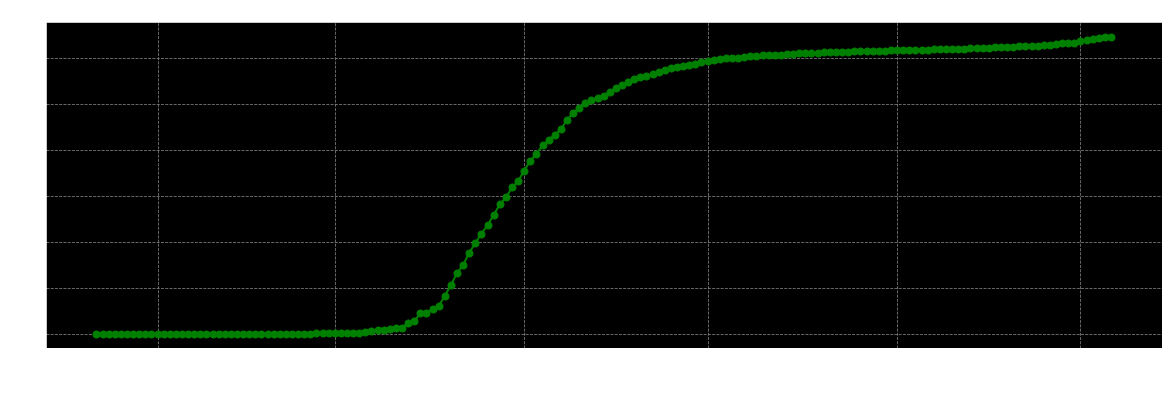

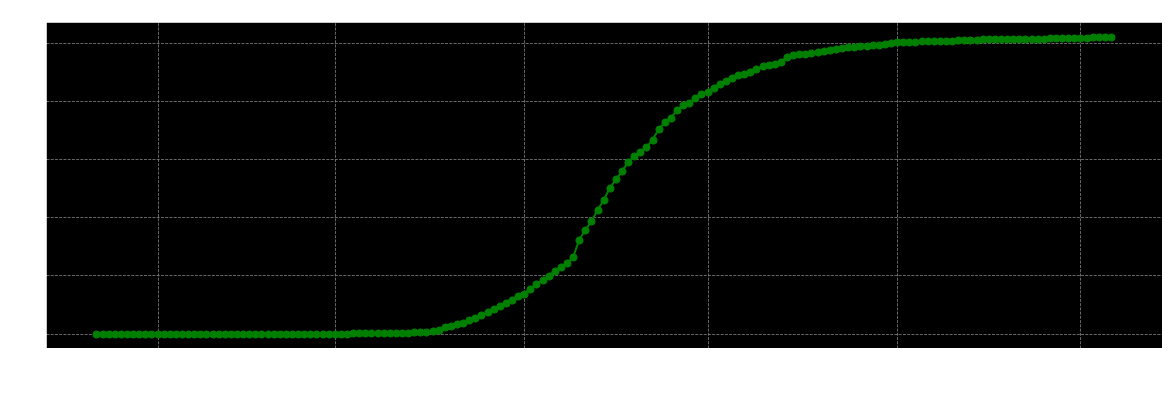

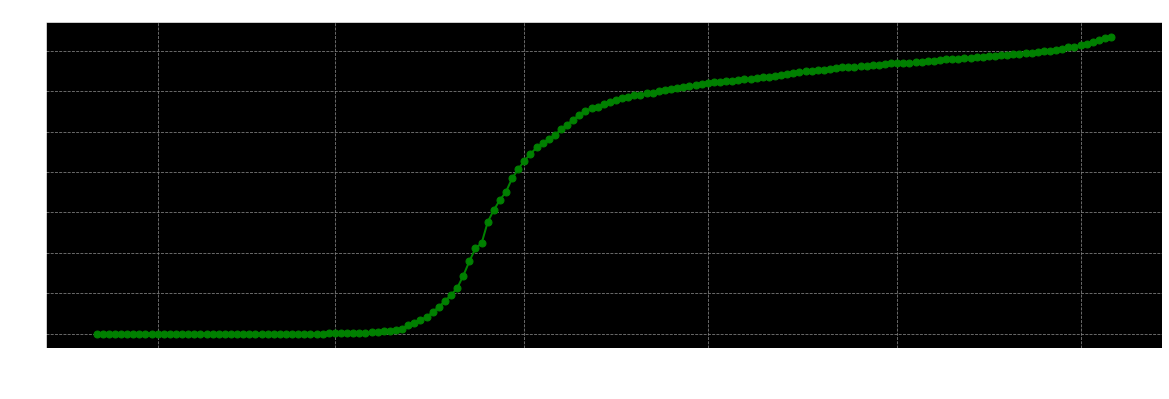

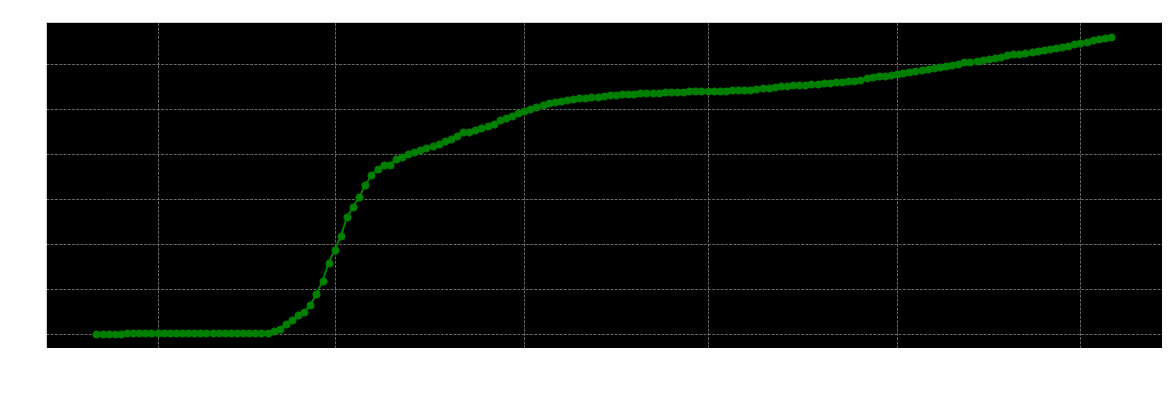

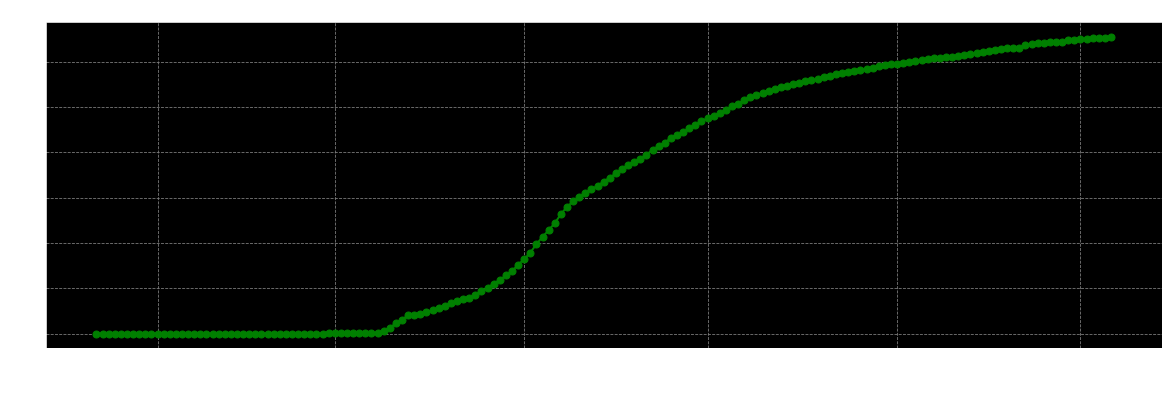

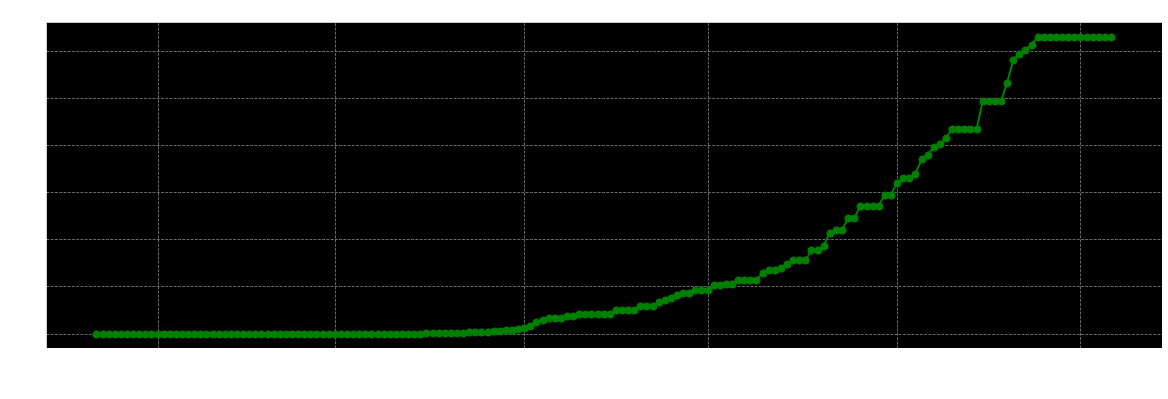

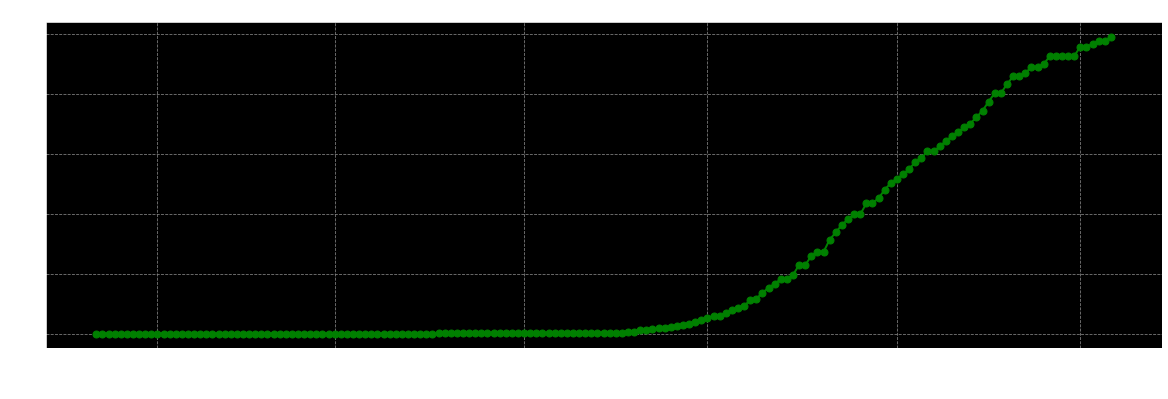

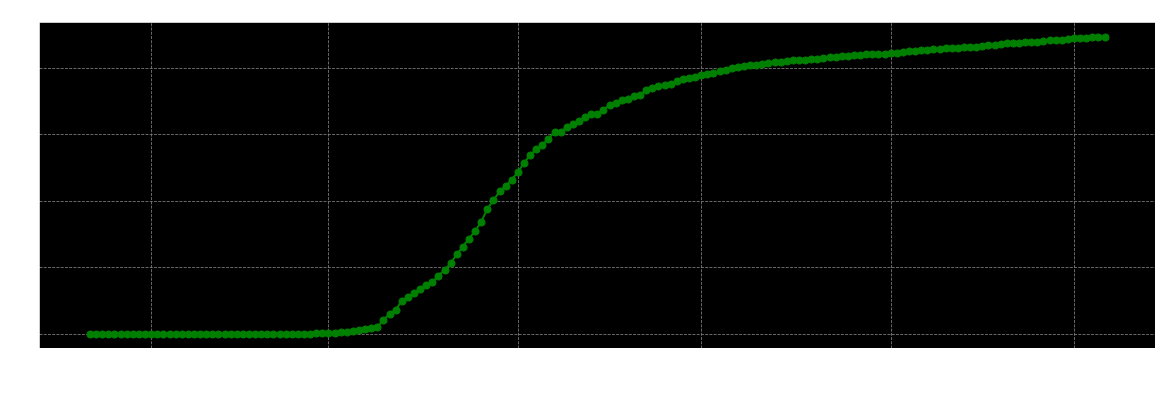

In [ ]:
def flattened_curve(country_list): 
  for country in country_list: 
    country_cases = conf_df[conf_df['Country/Region'] == country].iloc[:, 4:].apply(sum, axis=0) 
    country_cases.index = pd.to_datetime(country_cases.index)
    plt.figure(figsize=(20, 6)) 
    plt.title('Total Coronavirus Cases Reported in {country}') 
    plt.plot(country_cases.index, country_cases, c='g', linewidth=2, marker='o', markersize=7) 
    plt.xticks(rotation=45) 
    plt.grid(True, 'major', linestyle='--', c='grey') 
    plt.show()
flattened_curve(countries[:10])


In [ ]:
deaths_df = pd.read_csv(deaths_csv) 
deaths_df.head()


Province/State Country/Region      Lat  ...  7/4/20  7/5/20  7/6/20
0            NaN    Afghanistan  33.0000  ...     826     864     898
1            NaN        Albania  41.1533  ...      74      76      79
2            NaN        Algeria  28.0339  ...     946     952     959
3            NaN        Andorra  42.5063  ...      52      52      52
4            NaN         Angola -11.2027  ...      19      19      19

[5 rows x 171 columns]

In [ ]:
rec_df = pd.read_csv(rec_csv) 
rec_df.head()


Province/State Country/Region      Lat  ...  7/4/20  7/5/20  7/6/20
0            NaN    Afghanistan  33.0000  ...   19164   19366   20103
1            NaN        Albania  41.1533  ...    1637    1657    1702
2            NaN        Algeria  28.0339  ...   11181   11492   11884
3            NaN        Andorra  42.5063  ...     800     800     800
4            NaN         Angola -11.2027  ...     108     108     108

[5 rows x 171 columns]